In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
df = pd.read_csv('/kaggle/input/test-file/tested.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
def Talents(column, dataset):
    column_data = dataset[column]

    if column_data.dtype == 'object':
        top_values = column_data.value_counts().sort_values(ascending=False)[:10]
        top_values.plot(kind="bar", figsize=(10, 6), color="skyblue", edgecolor="navy")
        plt.xticks(rotation=0)
        plt.title("Titanic Data -  Distribution of  {}".format(column))
        plt.xlabel(column)
        plt.ylabel("Count")
        plt.show()
    else:
        plt.figure(figsize=(8, 6))
        sns.histplot(column_data, color="salmon", kde=True, edgecolor="black")
        plt.title("Titanic Data - Distribution of {}".format(column), fontsize=12)
        plt.xlabel(column, fontsize=10)
        plt.ylabel("Frequency", fontsize=10)
        plt.show()

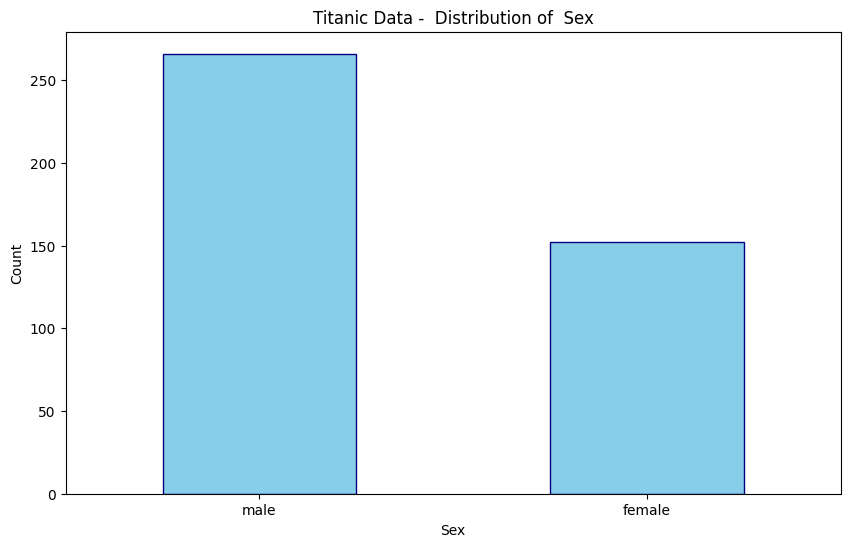

In [6]:
Talents('Sex', df)


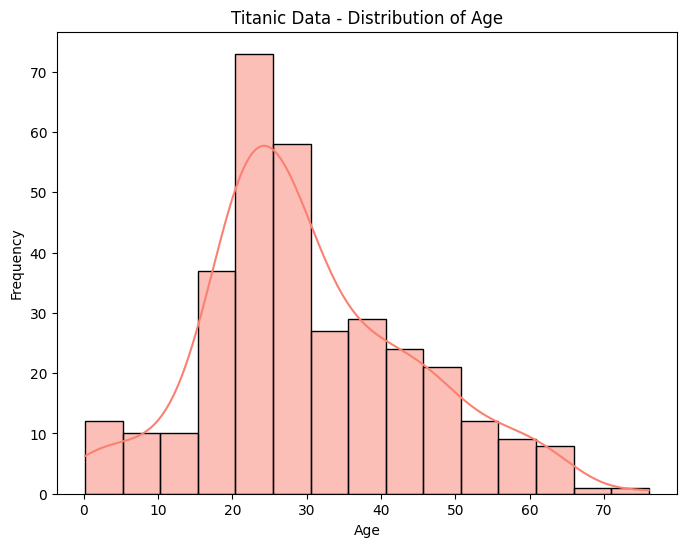

In [7]:
Talents('Age', df)

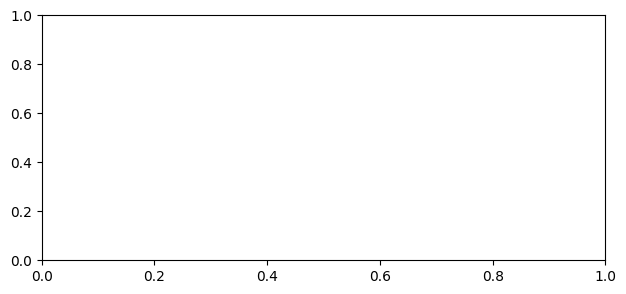

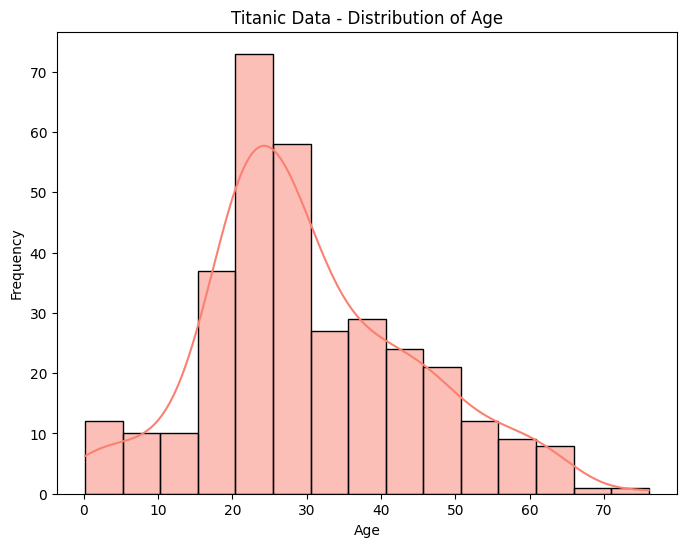

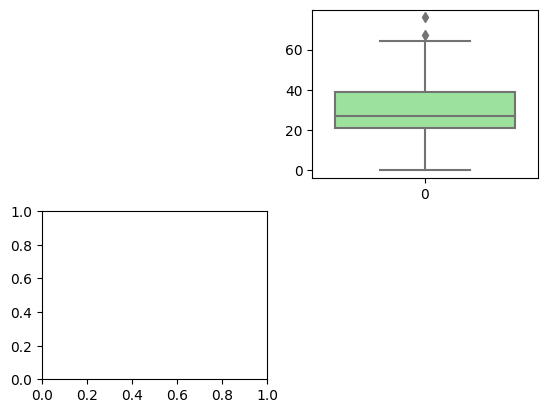

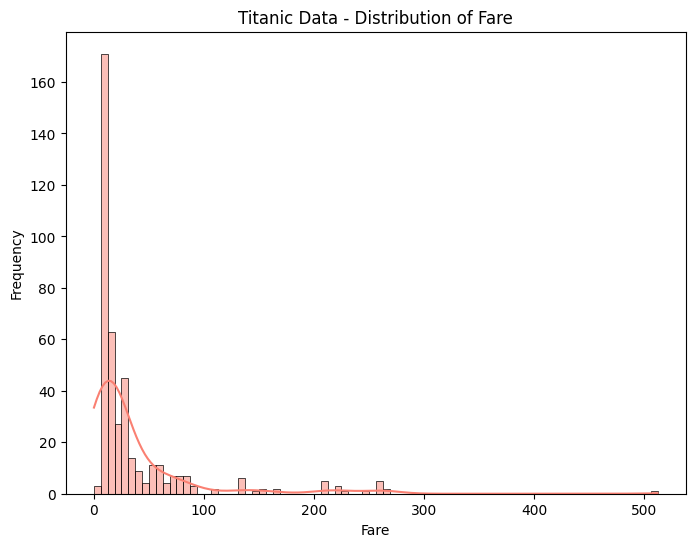

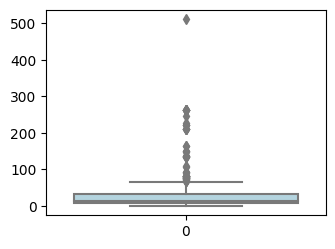

In [8]:
plt.figure(figsize=(16,7))

plt.subplot(2,2,1)
Talents('Age', df)

plt.subplot(2,2,2)
sns.boxplot(df['Age'],color='lightgreen')

plt.subplot(2,2,3)
Talents('Fare', df)

plt.subplot(2,2,4)
sns.boxplot(df['Fare'],color='lightblue')

plt.tight_layout()
plt.show()

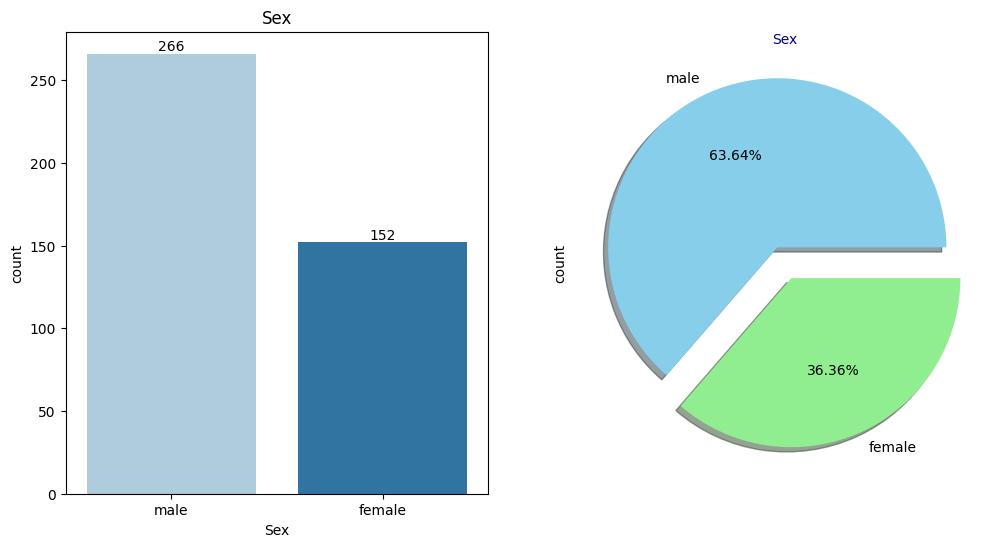

In [9]:
plt.figure(figsize=(12,6))

ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Sex', data=df, palette='Paired')
ax.bar_label(ax.containers[0], fontsize=10)
plt.title("Sex", fontsize=12)

ax = plt.subplot(1,2,2)
ax = df['Sex'].value_counts().plot.pie(explode=[0.1, 0.1], autopct='%1.2f%%', shadow=True, colors=['skyblue', 'lightgreen'])
ax.set_title(label="Sex", fontsize=14, color='navy', font='Lucida Calligraphy')
plt.show()

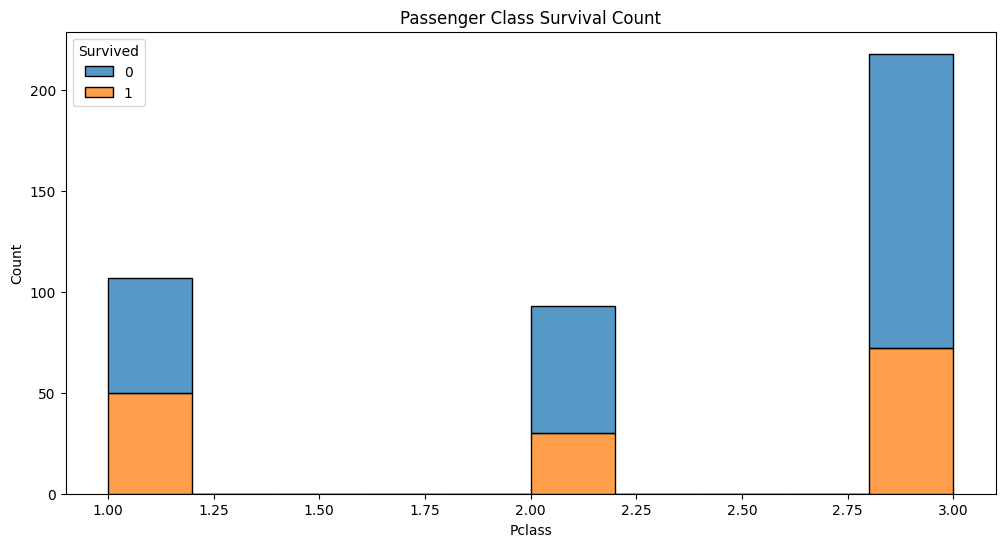

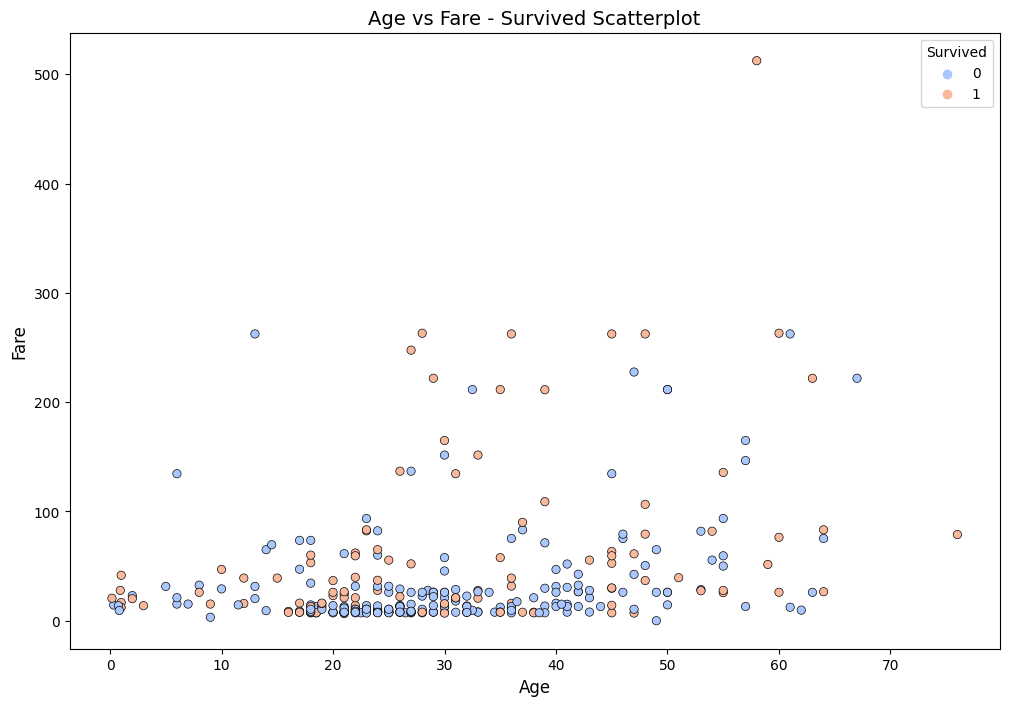

In [10]:
plt.figure(figsize=(12,6))

sns.histplot(data=df, x='Pclass', hue='Survived', multiple='stack', palette='tab10', edgecolor='black')
plt.title('Passenger Class Survival Count', fontsize=12)
plt.xlabel('Pclass', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.show()

plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived', palette='coolwarm', edgecolor='black')
plt.title('Age vs Fare - Survived Scatterplot', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Fare', fontsize=12)
plt.show()


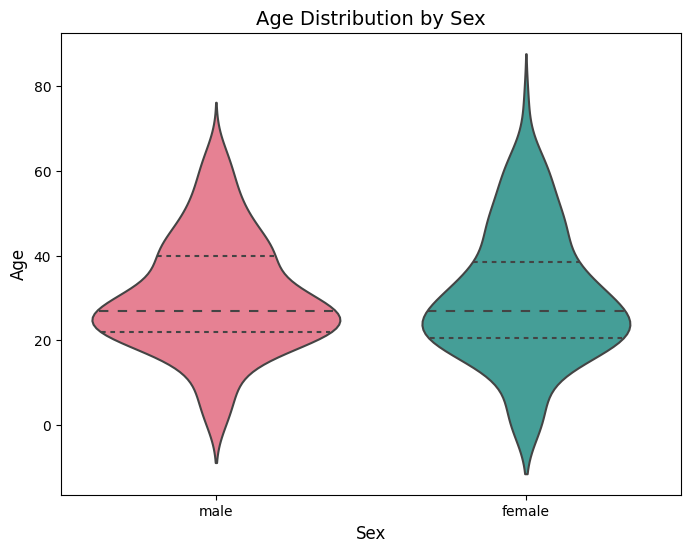

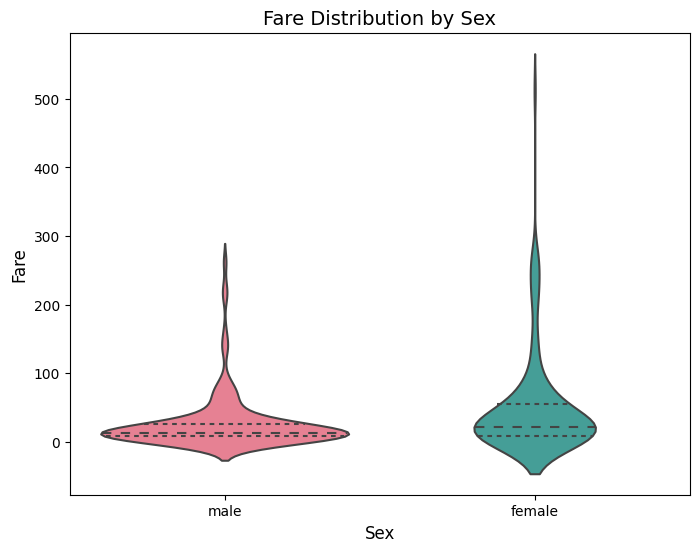

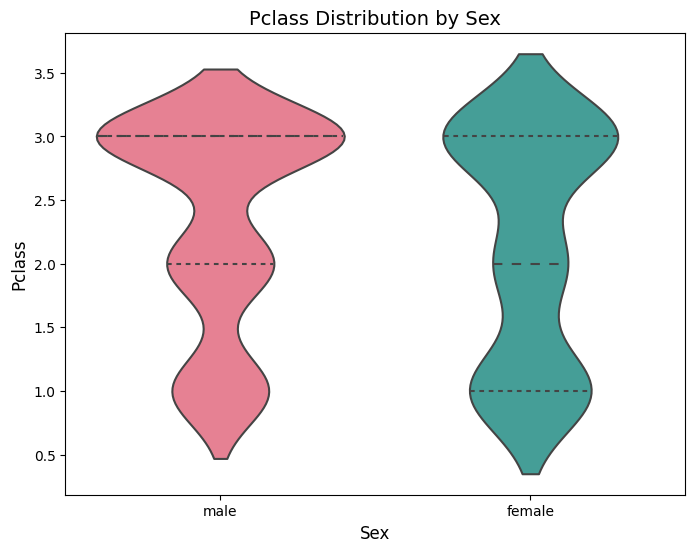

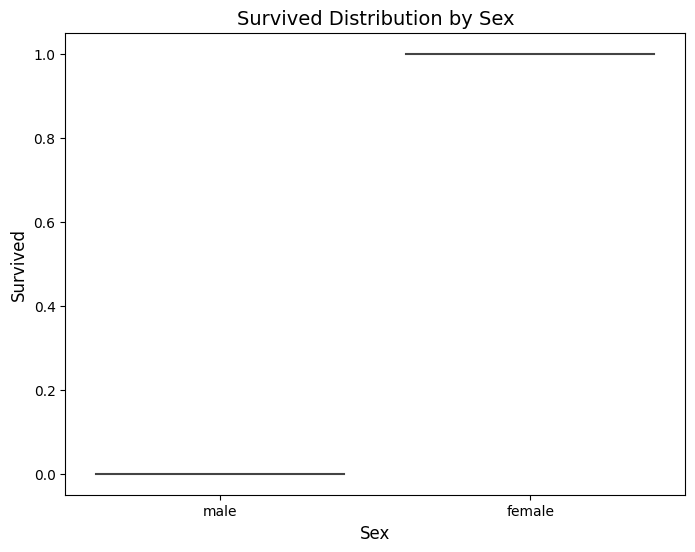

In [11]:
columns_to_plot = ['Age', 'Fare', 'Pclass', 'Survived'] 

for column in columns_to_plot:
    plt.figure(figsize=(8, 6))
    sns.violinplot(y=column, x='Sex', data=df, inner='quartile', palette='husl')
    plt.title(f'{column} Distribution by Sex', fontsize=14)
    plt.xlabel('Sex', fontsize=12)
    plt.ylabel(column, fontsize=12)
    plt.show()


<Figure size 1000x600 with 0 Axes>

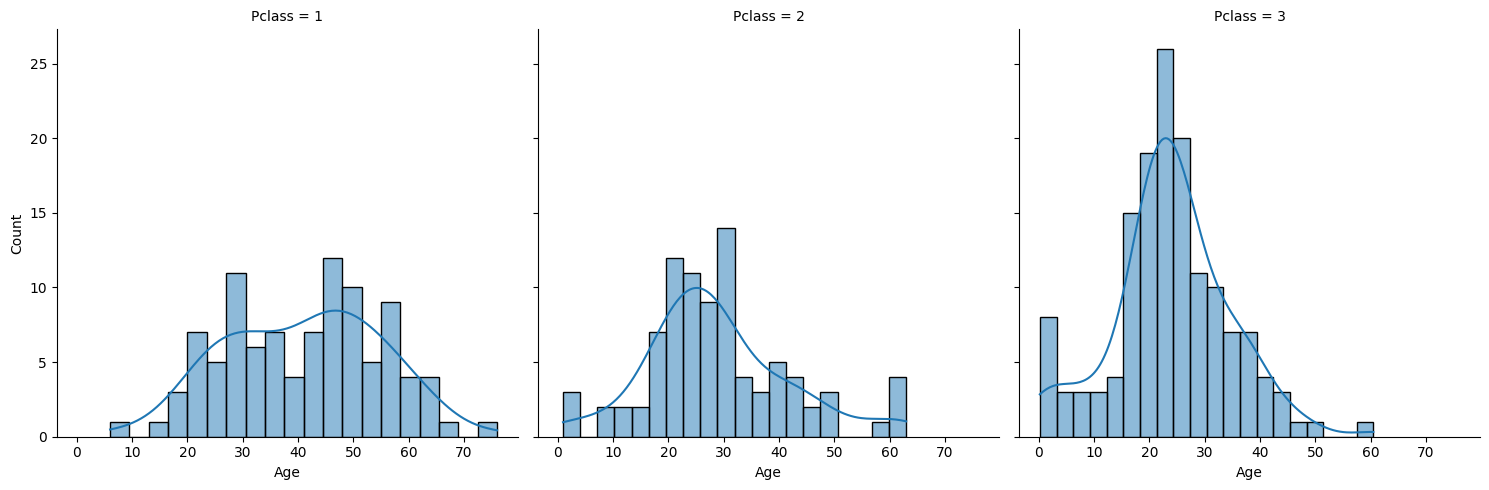

In [12]:
plt.figure(figsize=(10, 6))
g = sns.FacetGrid(df, col="Pclass", height=5, palette='Set2')
g.map(sns.histplot, "Age", bins=20, kde=True)
plt.show()


<Figure size 800x600 with 0 Axes>

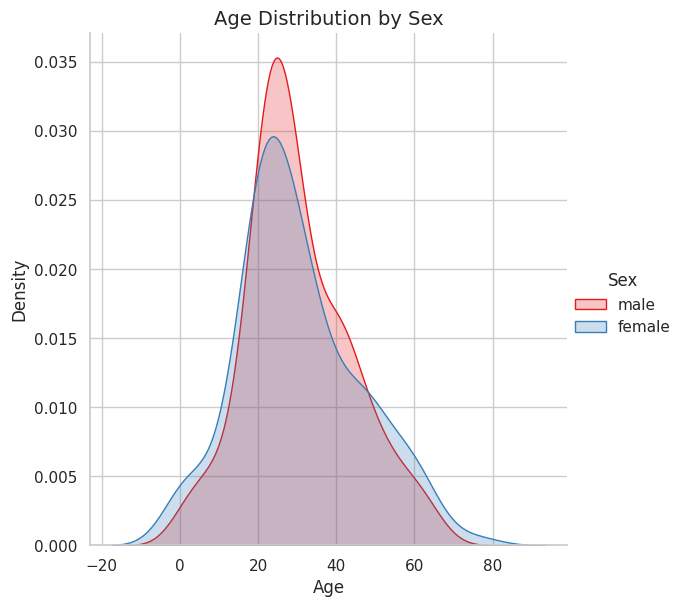

In [13]:
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
g = sns.FacetGrid(df, hue='Sex', height=6, palette='Set1')
g.map(sns.kdeplot, 'Age',fill=True)
g.add_legend()
plt.title('Age Distribution by Sex', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

<Figure size 1000x600 with 0 Axes>

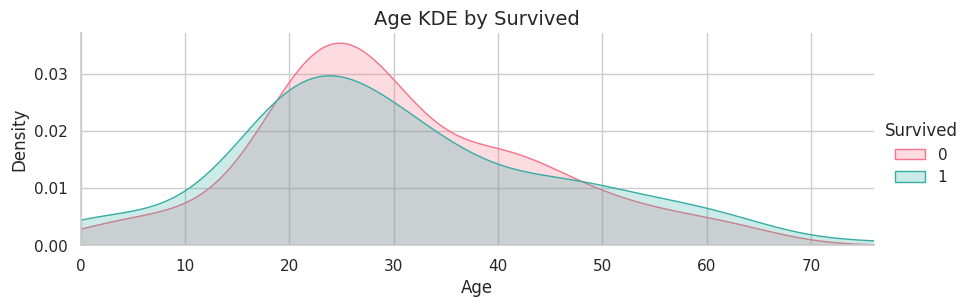

In [14]:
plt.figure(figsize=(10, 6))
fig = sns.FacetGrid(df, hue="Survived", aspect=3, palette='husl')
fig.map(sns.kdeplot, 'Age',fill= True)
oldest = df['Age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend(title='Survived')
plt.title("Age KDE by Survived", fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()